## Описание проекта
    Даны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
    Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й. 

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

In [1]:
# Библиотеки
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('***es.csv')
data.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

In [4]:
# Заменим названия столбцов 
data.columns = data.columns.str.lower()
data.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# Преобразуем данные в нужные типы
data[['year_of_release']] = data['year_of_release'].astype('Int64')
data.loc[data['user_score'] =='tbd','user_score'] ='999'
data['user_score'] = data['user_score'].astype('float64')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
lower_dic = ['name', 'platform', 'genre']

for i in lower_dic:
    data[i] = data[i].str.lower()

In [7]:
data.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8087,"the chronicles of narnia: the lion, the witch ...",ds,2005,action,0.15,0.01,0.00,0.01,65.0,7.5,E10+
11100,captain tsubasa: aratanaru densetsu joshou,ps,2002,sports,0.00,0.00,0.08,0.01,NaN,NaN,NaN
4447,food network: cook or be cooked,wii,2009,misc,0.41,0.00,0.00,0.03,53.0,6.8,E
8303,hunter: the reckoning redeemer,xb,2003,action,0.13,0.04,0.00,0.01,72.0,8.6,M
3761,2 in 1 combo pack: sonic heroes / super monkey...,xb,2004,misc,0.40,0.11,0.00,0.02,NaN,NaN,NaN
3089,ratchet & clank: into the nexus,ps3,2013,shooter,0.30,0.25,0.00,0.10,NaN,NaN,NaN
11292,america's army: true soldiers,x360,2007,shooter,0.08,0.00,0.00,0.01,43.0,6.7,T
4495,mlb 14: the show,ps3,2014,sports,0.35,0.00,0.00,0.08,81.0,6.8,E
9788,solitaire & mahjong,wii,2009,puzzle,0.11,0.00,0.00,0.01,NaN,NaN,NaN
9594,dt racer,ps2,2005,racing,0.06,0.05,0.00,0.02,NaN,3.8,E


In [8]:
# Удалим данные пропусков в name и возможные дубликаты
display(data[data['name'].isna() ==True])
data.dropna(subset = ['name'], inplace = True)
data = data.drop_duplicates().reset_index(drop=True)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
# Пропуски в critic_score
display(data[data['critic_score'] ==0])
data['critic_score'] = data['critic_score'].fillna(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
# Заменим пропуски на медианы
data.dropna(subset = ['year_of_release'], inplace = True)
data.reset_index(drop=True, inplace=True)

# Пропуски в рейтинкге
data['rating'] = data['rating'].fillna('unknown')


In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,NaN,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,NaN,unknown


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Пропуски в столбце name обработать не представляется возможным. Поскольку столбец является ключевым, строки с пропусками удаляем. 

Пропуски в столбце year_of_release  и user_score_median по возможности заменяем на данные с други платформ. Для этого в отдельных датафреймах собираем все уникальные данные по ключевому столбцу name. Далее добавляем эти данные к главному датафрейму с помощью merge() и методом индексации заменяем пустые строки на медианные значения. Встолбцах остаются пропуски ненайденых дат релизов и оценок пользователей, но уже не в меньшем количестве. Возможные причины пропусков в столбце user_score:
- сбой при выгрузке или человеческий фактор
- в игру давно не играют и соответственно отсутствуют данные о рейтинге(характерно для игр старше 7 лет)
- игра только вышла и о ней еще не знают(характерно для игр не страше 2 лет). Значения tbd в столбце говорят о скором появлении данных('to be determined') и о том, что игра в активном состоянии и пользователи ее оценивают. Для дальнейшей возможности использовать столбец в исследовнии изменим тип данных на 'float64', а tbd присвоим числовое значение 999.

От оставшихся пропусков в столбце year_of_release также принято решение избавиться.

Пропуски в столбце critic_score. После проверки на наличие в столбце рейтинга со значением 0(отсутствуют), принято решение все пропуски заменить на 0 и изменить тип данных столбца на 'int'. Данное решение позволяет испоользовать остальные данные строк с пропусками в данном столбце. Возможная причина пропусков: скорее всего данная игра не проходила оценку критиков.

Пропуски в столбце rating принято решение не обрабатывать.

In [13]:
# Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,NaN,unknown,31.38


## Исследовательский анализ данных

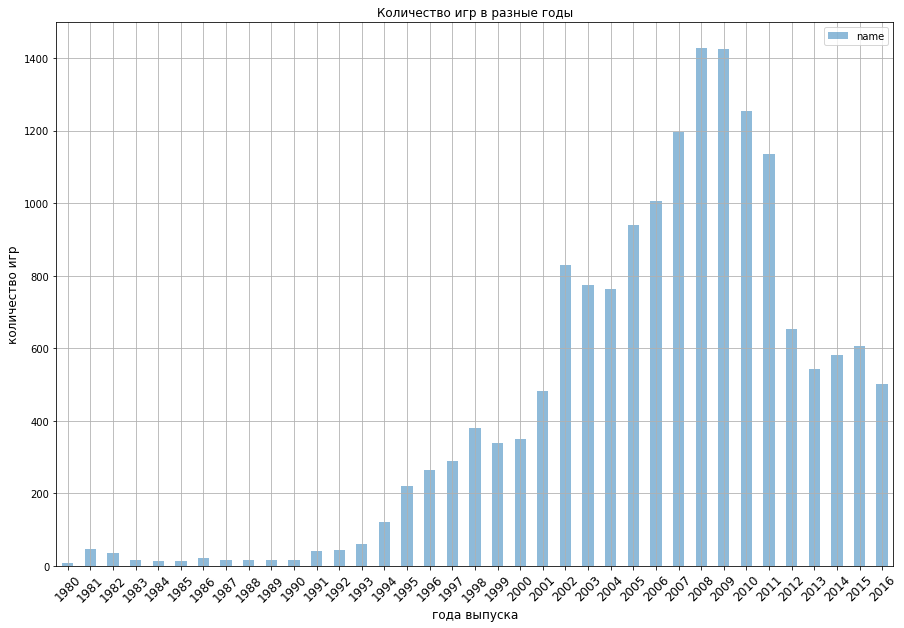

In [14]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
data.pivot_table(index = 'year_of_release',values = 'name', aggfunc = 'count'
                ).plot(kind='bar', alpha = 0.5, title= 'Количество игр в разные годы', grid = True, figsize=(15, 10))
plt.xticks(fontsize=12, rotation=45)
plt.xlabel('года выпуска', fontsize=12)
plt.ylabel('количество игр', fontsize=12)
plt.show()
None

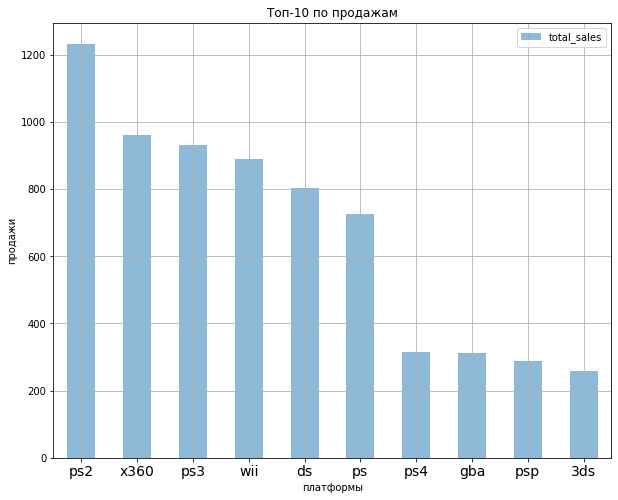

In [15]:
# Как менялись продажи по платформам. Топ-10 по продажам.
total_sales_10 = data.pivot_table(index = 'platform',values = 'total_sales', aggfunc = 'sum').sort_values(by= 'total_sales', ascending = False).head(10)
total_sales_10.plot(kind='bar', alpha = 0.5, title= 'Топ-10 по продажам', grid = True, figsize=(10, 8))
plt.xticks(fontsize=14, rotation=0)
plt.xlabel('платформы')
plt.ylabel('продажи')
None

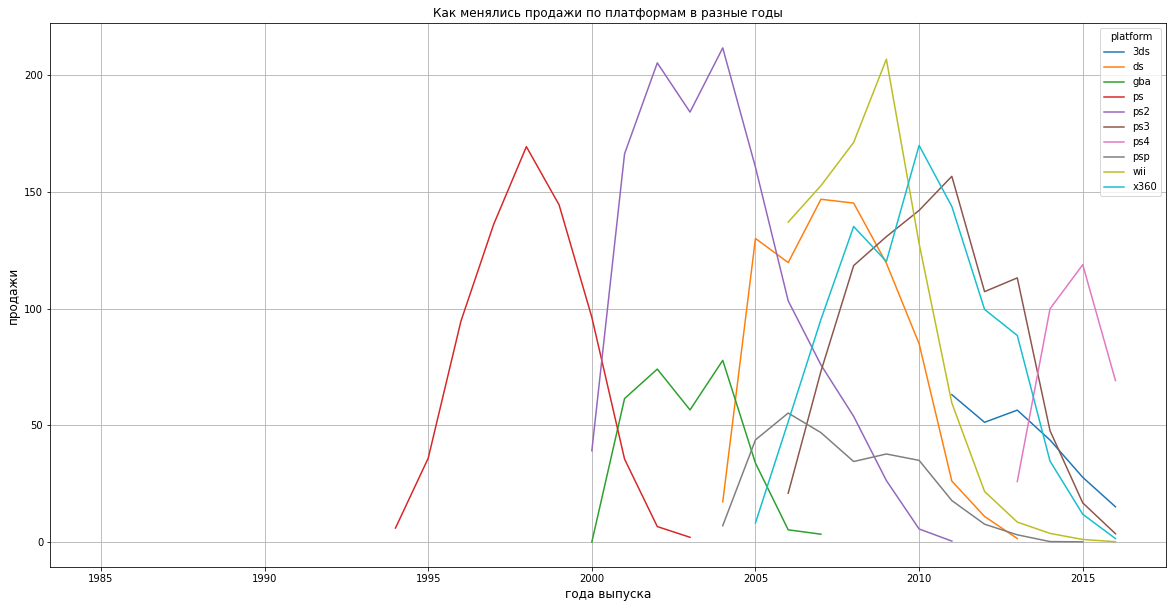

In [16]:
total_sales_10 = total_sales_10.reset_index()
data[data['platform'].isin(total_sales_10['platform']) == True].pivot_table(index='year_of_release', 
             columns = 'platform', values='total_sales', 
             aggfunc='sum').plot(grid=True, figsize=(20, 10), title= 'Как менялись продажи по платформам в разные годы') 
plt.xlabel('года выпуска', fontsize=12)
plt.ylabel('продажи', fontsize=12)
None

Меньше всего игр выпускалось на заре индустрии в 1980 году, дальше количество с каждым годом увеличивалось. Самыми активными по прадажам были 2005-2011гг, далее объем выпуска игр пошел на спад. Количество игр до 1994 достаточно мало, для дальнейшего исследования логичнее брать период после 1994 года.

Топ-10 платформ: `ps2`, `x360` , `ps3`, `wii`, `ds`, `ps`, `ps4`, `gba`, `psp`, `pc`. Примерно за 7-11 лет появляются новые и исчезают старые платформы. Пик популярности начинается спустя год и продолжается примерно 3-5 лет, далее идет спад и "отмирание" платформы. Исходя из этой тенденции стоит брать года с действующими платформами до 2016. На 2016 действуют `wii`, `pc`, `x360`, `ps3`, `ps4`. Из них 3 платформы входят в Топ-5. Посмотрим самые активные года: 2010-2015. Этот период также демонстрирует "рождение" и "отмирание" платформ.

Предположительно прибыльными в 2017г будут:
- ps4
- ps3
- pc

<div class="alert alert-info">
<h2>  <a class="tocSkip"> </h2> 

Позже 2015 года брать информацию на мой взгляд не имеет смысла. По условию данные за 2016 предоставлены не в полном объеме

<div class="alert alert-info">
<h2>  <a class="tocSkip"> </h2> 

Аргументация достаточно проста:
- Если по условию данные даны не в полном объеме, занчит как минимум декабрь выпадает из датасета или конец декабря отсутствует
- Посмотрим что происходит в декабре в Европе, Северной Америке и Японии. Там традиционные рождественские праздники. И что бы не быть голословной прилагаю скрины из поисковика Яндекса:
    
<img src=http://joxi.ru/YmEwOPkSL0KY8A.jpg><br>        
<img src=http://joxi.ru/bmolG3Oilx8LN2.jpg><br>        
<img src=http://joxi.ru/D2PwqPBSWp9ekm.jpg><br>
    
  
- Как и у нас в России, люди в этот период покупают подарки(подарочные карты) 
- Берут дополнительные выходные или отпуска и проводят время с семьей. Ну как тут с братишкой не сыграть в майнкрафт?!
- Выходные, семейные праздники, традиционные подарки - есть некоторое предположение, что в этот период продажи будут выглядеть иначе, то есть скорее всего возрастут. И по моим ощущениям было бы неправильно исключить эти данные в 2016, но при этом учесть их в предыдущие 3-4 года, выбранного периода. Возможно  именно в этот период стоит провести рекламную кампанию прогназируемого периода.
    
    
 Исходя из вышеперечисленных аргументов, считаю что верхняя граница по 2015 году подходит лучше всего:
  - данные есть за весь год
  - в этот период попадает цикличное рождение и отмирание платформ
  - в этот же период попадают платформы, которые будут и в прогнозируемом 2017

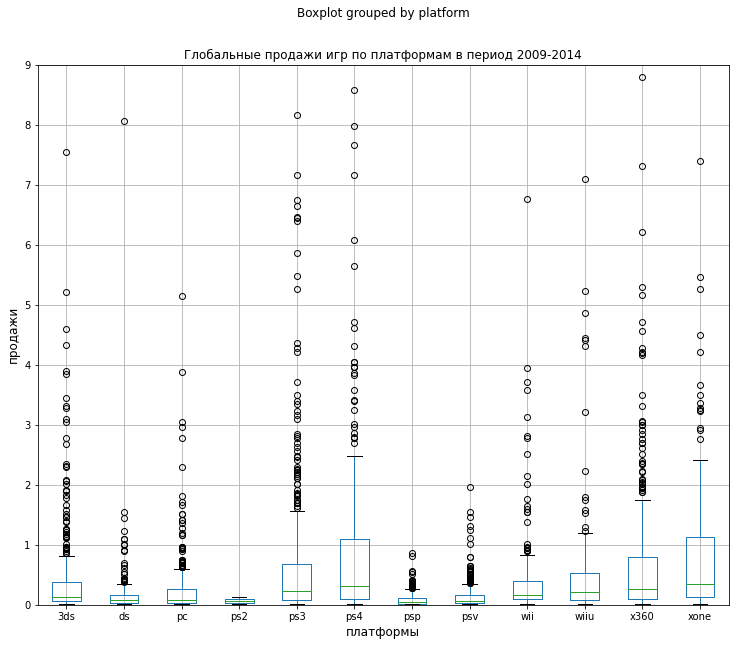

In [17]:
# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

#График «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_predict = data[(data['year_of_release']> 2010) & (data['year_of_release']<= 2015)]
data_predict.boxplot('total_sales', by='platform', figsize=(12, 10))
plt.ylim(0, 9)
plt.title('Глобальные продажи игр по платформам в период 2009-2014') 
plt.ylabel('продажи', fontsize=12)
plt.xlabel('платформы', fontsize=12)
plt.show()
None

График построен на основе выборки за 2009-2014. В тройку лидеров вошли: `ps4` , `xone`, `x360`. Cамые маленькие продажи у платформы `psp2`. Разница в размахе диаграм продаж между лидером и отстающим чуть меньше 4 миллионов проданных копий.

Кореляция между оценкой пользователей и продажами платформы ps4 0.024230832360622557
Кореляция между оценкой критиков и продажами платформы ps4 0.20207414133786739

Кореляция между оценкой пользователей и продажами платформы xone -0.03926828544552199
Кореляция между оценкой критиков и продажами платформы xone 0.28618360291868705

Кореляция между оценкой пользователей и продажами платформы x360 0.029223244591035955
Кореляция между оценкой критиков и продажами платформы x360 0.30966484857204585



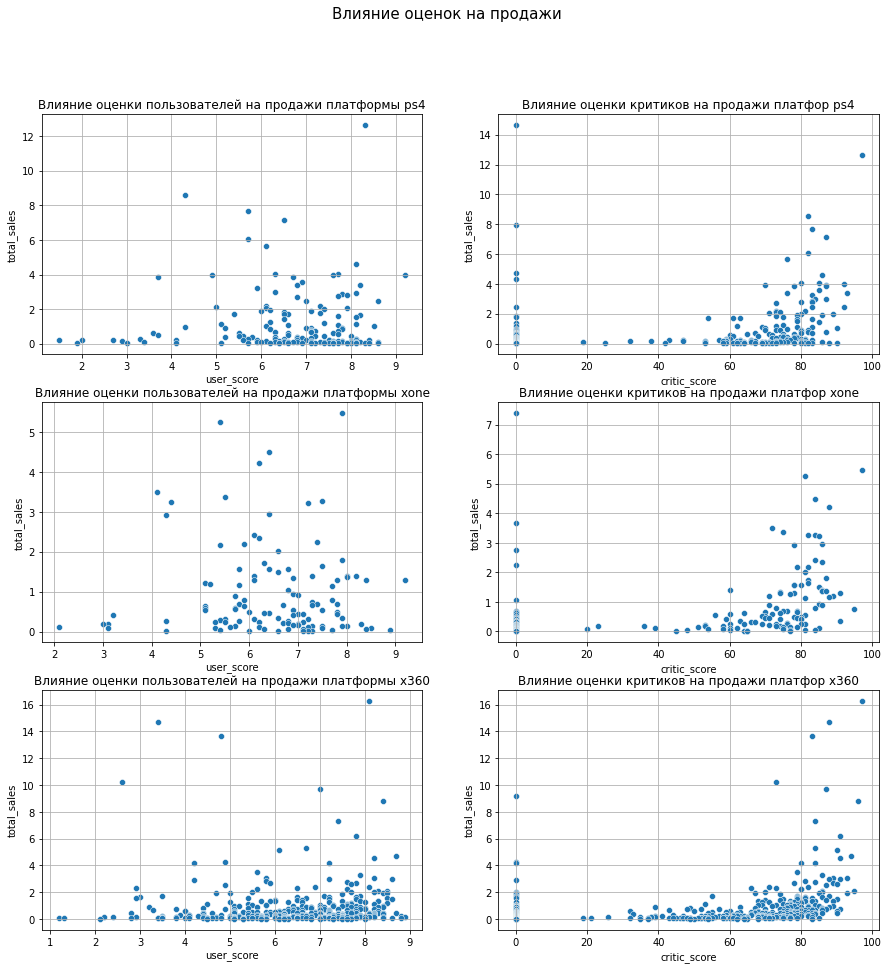

In [18]:
top_3 = ['ps4' , 'xone', 'x360']

fig = plt.figure(figsize=(15,15))
sns.color_palette("light:b", as_cmap=True)
k=0
for platform in  top_3:
    k+=1  
    correlation_data_1 = data_predict[(data_predict['platform'] == platform) & (data_predict['user_score'] != 999)]
        
    correlation_data_2 = data_predict[(data_predict['platform'] == platform)]
    print('Кореляция между оценкой пользователей и продажами платформы', platform, correlation_data_1['user_score'].corr(correlation_data_1['total_sales']))
    
    print('Кореляция между оценкой критиков и продажами платформы', platform, correlation_data_2['critic_score'].corr(correlation_data_2['total_sales']))
    print()
    title_1 = 'Влияние оценки пользователей на продажи платформы ' + platform
    fig.add_subplot(3, 2, k)
    sns.scatterplot(data=correlation_data_1, x="user_score", y="total_sales", palette="Blues_r")
    plt.title(title_1)
    plt.grid(True)
    
    k+=1    
    fig.add_subplot(3, 2, k)
    title_2 = 'Влияние оценки критиков на продажи платфор ' +  platform
    sns.scatterplot(data=correlation_data_2, x="critic_score", y="total_sales", palette="Blues_r")
    plt.title(title_2)
    plt.grid(True)
        
fig.suptitle('Влияние оценок на продажи', fontsize=15)
plt.show
None

Если анализировать диаграммы рассеяния то наблюдается закономерность: чем выше оценки, тем больше продаж. 
Коэффициент корреляции между оценкой пользователей и продажами платформы имеет значение окло 0 и отрицательные значения. То есть при изменении одной величины другая или останется почти прежней, или при росте одной величины будет уменьшаться другая. Коэффициент корреляции между оценкой критиков и продажами платформы показывает зависимость, однако не слишком сильной, то есть при увеличении одной величины, будет увеличиваться и вторая.

Text(0, 0.5, 'количество')

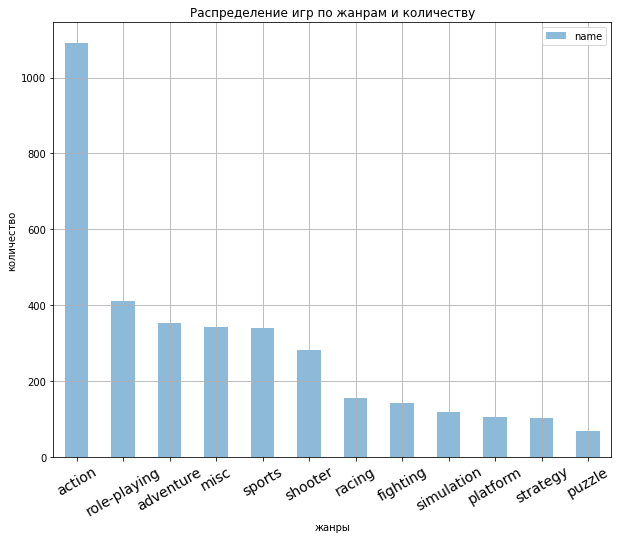

In [19]:
# Общее распределение игр по жанрам

data_predict.pivot_table(index = 'genre',values = 'name'
                         , aggfunc = 'count').sort_values(by= 'name'
                         , ascending = False).plot(kind='bar', alpha = 0.5
                         , title= 'Распределение игр по жанрам и количеству', grid = True, figsize=(10, 8))
plt.xticks(fontsize=14, rotation=30)
plt.xlabel('жанры')
plt.ylabel('количество')

Text(0, 0.5, 'продажи')

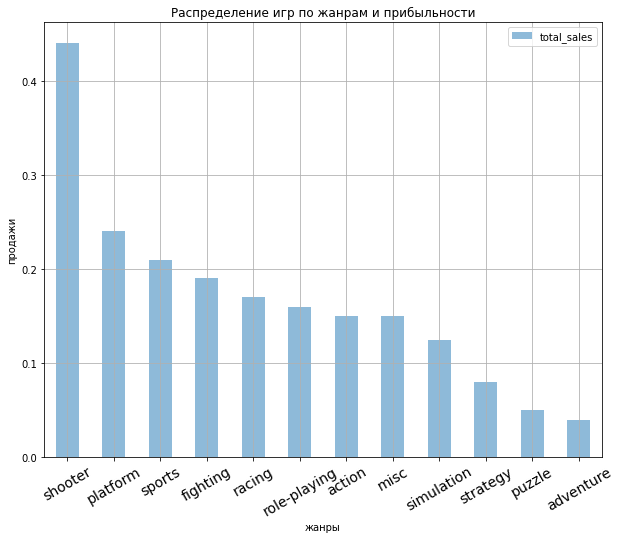

In [20]:
# Общее распределение игр по жанрам

data_predict.pivot_table(index = 'genre',values = 'total_sales'
                         , aggfunc = 'median').sort_values(by= 'total_sales'
                         , ascending = False).plot(kind='bar', alpha = 0.5
                         , title= 'Распределение игр по жанрам и прибыльности', grid = True, figsize=(10, 8))
plt.xticks(fontsize=14, rotation=30)
plt.xlabel('жанры')
plt.ylabel('продажи')

Больше всего игр в жанре `action`, он же лучше всего продается. В тройку по количеству также вошли `misc` и `sports`, в продажах же это `shooter`, `platfom` и `sports`. Самый непопулярный и плохопродоваемый жанр по количеству `puzzle`, а по продажам `adventure`. 


## Портрет пользователя каждого региона

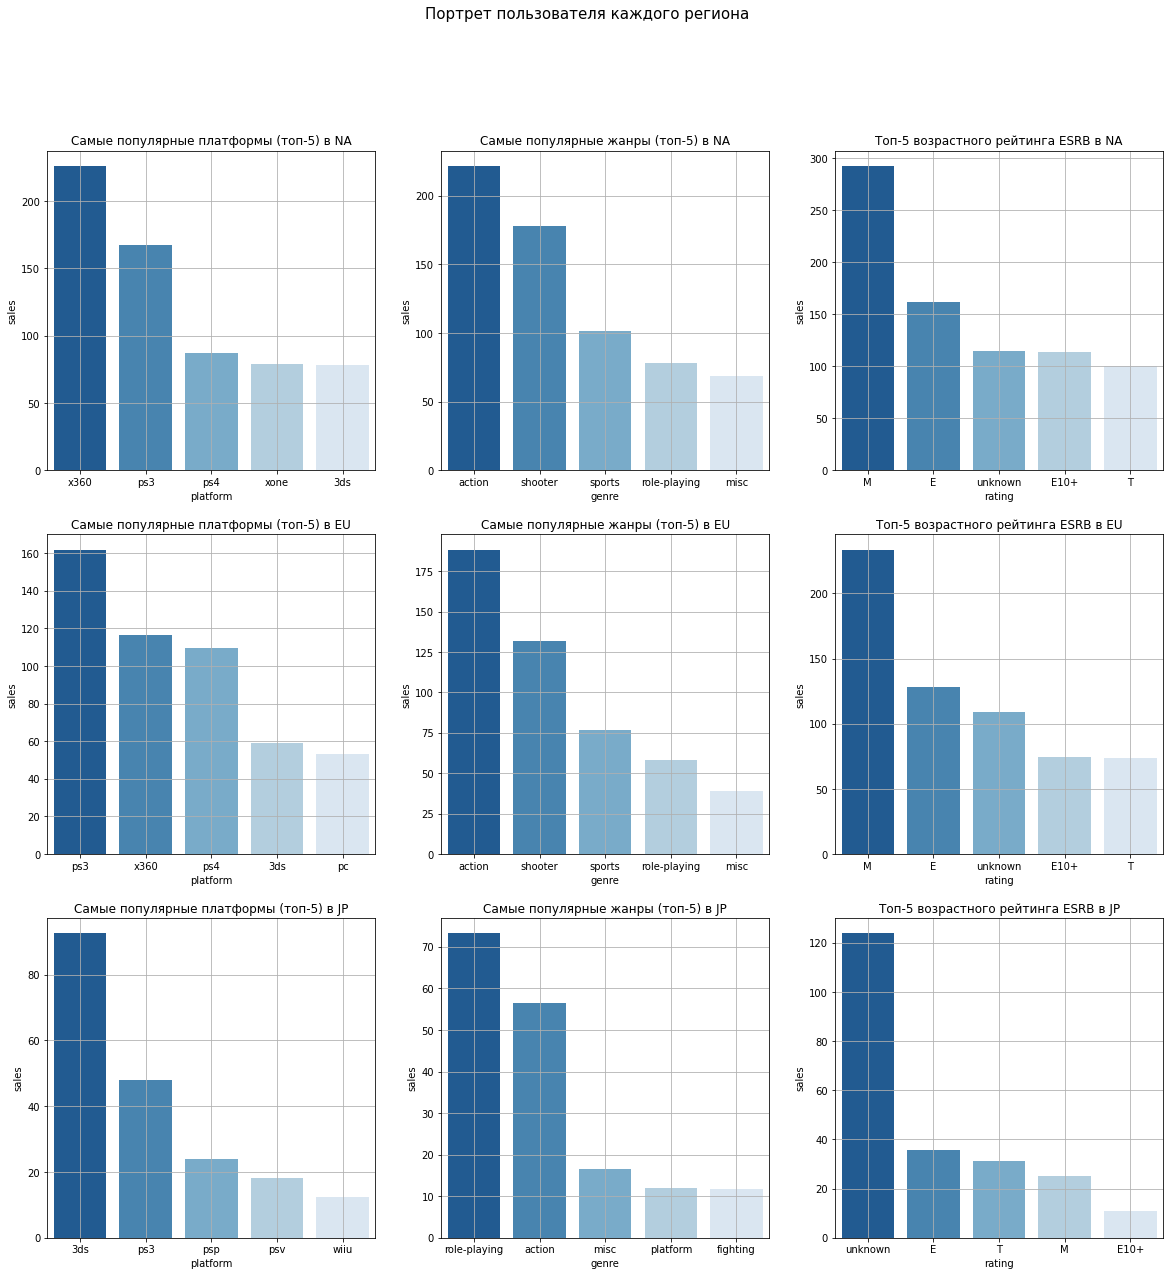

In [21]:
top_5 = data_predict.sort_values(by = 'total_sales', ascending = False )
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
region = ['NA', 'EU', 'JP']


index = 0

fig = plt.figure(figsize=(20,20))
for k in range(1, (10), 3): 
    
    

    title = 'Самые популярные платформы (топ-5) в ' +  region[index]
    platform_5 = top_5.pivot_table(index = 'platform',values = region_sales[index]
                         , aggfunc = 'sum').sort_values(by= region_sales[index]
                         , ascending = False).head().reset_index()
    platform_5.columns = ['platform', 'sales']
    fig.add_subplot(3, 3, k)
    sns.barplot( x = 'platform', y = 'sales', data = platform_5, palette="Blues_r", saturation = 0.75)
    plt.title(title)
    plt.grid(True)

       
    title = 'Самые популярные жанры (топ-5) в ' +  region[index]
    genre_5 = top_5.pivot_table(index = 'genre',values = region_sales[index]
                         , aggfunc = 'sum').sort_values(by= region_sales[index]
                         , ascending = False).head().reset_index()
    genre_5.columns = ['genre', 'sales']
    fig.add_subplot(3, 3, k+1)
    sns.barplot( x = 'genre', y = 'sales', data = genre_5, palette="Blues_r", saturation = 0.75)
    plt.title(title)
    plt.grid(True)
    
    
    title = 'Топ-5 возрастного рейтинга ESRB в ' +  region[index]
    rating_5 = top_5.pivot_table(index = 'rating',values = region_sales[index]
                         , aggfunc = 'sum').sort_values(by= region_sales[index]
                         , ascending = False).head().reset_index()
    rating_5.columns = ['rating', 'sales']
    fig.add_subplot(3, 3, k+2)
    sns.barplot( x = 'rating', y = 'sales', data = rating_5, palette="Blues_r", saturation = 0.75)
    plt.title(title)
    plt.grid(True)
    index +=1
fig.suptitle('Портрет пользователя каждого региона', fontsize=15)
plt.show
None

Список лидеров по трем регионам состоит всего из 8 платформ. Для региона NA главной платформой является `x360`, на 5м месте платформа `3ds`. Разница в продажах первым и пятым местом рейтинга около 160 мл копий. Для региона EU главной платформой является `ps3`, а топ-5 замыкает платформа `ps` с разницей продаж около 115 мл копий. Для региона JP  главной платформой является `3ds`, на пятом месте `wii`. Разница в продажах между первым и пятым местом рейтинга около 75 мл копий. Также можно наблюдать на этих графиках разный объем продаж лидирующих платформ: в регионе NA около 240 мл копий, в регионе EU около 170 мл копий, в регионе JP около 90 мл копий.

Топ-5 жанров по всем регионам состоит из 6 позиций. В регионах NA и EU список лидеров одинаковый. Жанр `action` возглавляет оба списка, а замыкает жанр `misc`. Для региона JP лидером является жанр `role-playing`, на 5 месте  `fighting`. Также можно наблюдать на этих графиках разный объем продаж по жанрам: в регионе NA около 240 мл копий у лидера и 70 мл копий у 5го места, в регионе EU около 190 мл копий и у 5го места 40 мл копий, в регионе JP  у лидера около 75 мл копий и на 5 месте  около 12 мл копий.
 
5 вариантов оценок в рейтинге ERSB. В регионах NA и EU лидируют игры с рейтингом `M`, в регионе JP больше всего игр с отсутствующим рейтингом(`unknown`).

## Проверка гипотез

In [22]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
xbox_one = data_predict[(~data_predict['user_score'].isna()==True
                        ) & (data_predict['user_score']!=999)].query('platform =="xone"')['user_score']

pc = data_predict[(~data_predict['user_score'].isna()==True
                  ) & (data_predict['user_score']!=999)].query('platform =="pc"')['user_score']


In [23]:
print("Средний пользовательский рейтинг платформы xone ", xbox_one.mean())
print()
print("Средний пользовательский рейтинг платформы pc ", pc.mean())

Средний пользовательский рейтинг платформы xone  6.477586206896552

Средний пользовательский рейтинг платформы pc  6.47824427480916


In [24]:
# Дисперсии выборок
print('Дисперсия выборки Xbox One',np.var(xbox_one, ddof=1)) 
print('Дисперсия выборки PC',np.var(pc, ddof=1)) 

# проверка гипотезы
alpha = 0.1

results = st.ttest_ind(xbox_one, pc, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые") 

Дисперсия выборки Xbox One 1.6594932533733138
Дисперсия выборки PC 2.528758591442193
p-значение: 0.9968723176117981
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [25]:
#Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
action =data_predict[(~data_predict['user_score'].isna()==True
                        ) & (data_predict['user_score']!=999)].query('genre =="action"')['user_score']
sports = data_predict[(~data_predict['user_score'].isna()==True
                        ) & (data_predict['user_score']!=999)].query('genre =="sports"')['user_score']
print('Средний рейтинг жанра Action', action.mean())
print('Средний рейтинг жанра Sports', sports.mean())

# Дисперсии выборок
print('Дисперсия выборки Action',np.var(action, ddof=1)) 
print('Дисперсия выборки Sports',np.var(sports, ddof=1)) 
# проверка гипотезы
alpha = 0.1

results = st.ttest_ind(action, sports, equal_var = True) # T-критерий Стьюдента

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги жанра Action и Sports разные")
else:
    print("Средние пользовательские рейтинги жанра Action и Sports одинаковые")

Средний рейтинг жанра Action 6.796027633851468
Средний рейтинг жанра Sports 5.689473684210526
Дисперсия выборки Action 1.7601399023492361
Дисперсия выборки Sports 2.66460020242915
p-значение: 4.4287702630764084e-21
Средние пользовательские рейтинги жанра Action и Sports разные


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для доказательства использовалась гипотеза о равенстве средних двух генеральных совокупностей(тест Т-Стьюдента). Основанием для применения данного теста является результат проверки равенства дисперсий с помощью теста Левена: pvalue=1.0, что говорит о равенстве дисперсий. За нулевую была принята гипотеза о равенстве рейтингов платформ. В качестве генеральных совокупностей были взяты выборки по соответствующим платформам. При формировании выборок "отмели" все пропущенные значения, что бы они не влияли на средний показатель. Пороговое значение alpha задавалось высокое (0.1) из-за маленькой выборки и большой вероятности погрешноти. В результате проверки показал гипотеза не подтвердилась.

Средние пользовательские рейтинги жанров Action и Sports разные. Схема доказательства гипотезы аналогична предыдущей. Результате проверки: гипотеза не подтвердилась.

## Выводы

Всреднем за 7-11 лет появляются новые и исчезают старые платформы. Есть долгожители такие как wiiu(с 1994 года) и платформы, не выдерживающие конкуренции например gen(1990-1994). Меньше всего игр выпускалось на заре индустрии в 1980 году, дальше количество с каждым годом увеличивалось. Самыми активными по прадажам были 2005-2011гг, далее объем выпуска игр пошел на спад. 

Топ-10 платформ: ps2, x360 , ps3, wii, ds, ps, ps4, gba, psp, pc. Пик популярности начинается спустя год и продолжается примерно 3-5 лет, далее идет спад и "отмирание" платформы. Исходя из этой тенденции для прогноза взяты 2010-2015. В этот промежуток попадают действующие на  2016г платформы: wii, pc, x360, ps3, ps4. Из них 3 платформы входят в Топ-5. Этот период также демонстрирует "рождение" и "отмирание" платформ.

Предположительно прибыльными в 2017г будут: `ps4`, `ps3`, `pc`.

Влияние отзывов пользователей и критиков на продажи выясняли с помощью диаграмм и корреляции. Диаграммы рассеяния говорят о том, что чем выше рейтинг на платформах, тем больше продаж. Коэффициент корреляции между рейтингом от пользователей и продажами платформы имеет значение почти равно 0. То есть при изменении одной величины другая останется почти прежней. Коэффициент корреляции между оценкой критиков и продажами платформы показывает зависимость, однако не слишком сильной, то есть при увеличении одной величины, будет увеличиваться и вторая. Упор на продвижение в пользоательских оценках скорее всего не стоит делать.

Список лидеров по трем регионам состоит всего из 8 платформ. Для региона NA главной платформой является `x360`, на 5м месте платформа `3ds`. Разница в продажах первым и пятым местом рейтинга около 160 мл копий. Для региона EU главной платформой является `ps3`, а топ-5 замыкает платформа `ps` с разницей продаж около 115 мл копий. Для региона JP  главной платформой является `3ds`, на пятом месте `wii`. Разница в продажах между первым и пятым местом рейтинга около 75 мл копий. Также можно наблюдать на этих графиках разный объем продаж лидирующих платформ: в регионе NA около 240 мл копий, в регионе EU около 170 мл копий, в регионе JP около 90 мл копий.

Топ-5 жанров по всем регионам состоит из 6 позиций. В регионах NA и EU список лидеров одинаковый. Жанр `action` возглавляет оба списка, а замыкает жанр `misc`. Для региона JP лидером является жанр `role-playing`, на 5 месте  `fighting`. Также можно наблюдать на этих графиках разный объем продаж по жанрам: в регионе NA около 240 мл копий у лидера и 70 мл копий у 5го места, в регионе EU около 190 мл копий и у 5го места 40 мл копий, в регионе JP  у лидера около 75 мл копий и на 5 месте  около 12 мл копий.
Топ-5 оценок в рейтинге ERSB. В регионах NA и EU лидируют игры с рейтингом M, в регионе JP больше всего игр с отсутствующим рейтингом(unknown). 

Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для доказательства использовалась гипотеза о равенстве средних двух генеральных совокупностей, поскольку выборки имеют нормальное распределение. За нулевую была принята гипотеза о равенстве рейтингов платформ. В качестве генеральных совокупностей были взяты выборки по соответствующим платформам. При формировании выборок "отмели" все пропущенные значения, чтобы они не влияли на средний показатель. Пороговое значение alpha задавалось высокое (0.1) из-за маленькой выборки и большой вероятности погрешности. В результате проверки показал гипотеза не подтвердилась.
Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные. Схема доказательства гипотезы аналогична предыдущей. Результате проверки: гипотеза не подтвердилась.